In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get raw data

features = ['organ_failure', 'hepatic', 'hematologic', 'metabolic',
       'neurologic', 'infection','organ_dysfunction',
       'mech_vent', 'heartrate_min', 'heartrate_max',
       'heartrate_mean', 'sysbp_min', 'sysbp_max', 'sysbp_mean', 'diasbp_min',
       'diasbp_max', 'diasbp_mean', 'resprate_mean', 'resprate_min',
       'resprate_max', 'tempc_mean', 'tempc_min', 'tempc_max',
       'weight',
       'bicarbonate_min', 'bicarbonate_max', 'bilirubin_min',
       'bilirubin_max', 'creatinine_min', 'creatinine_max', 'chloride_min',
       'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min',
       'hematocrit_max', 'hemoglobin_min', 'hemoglobin_max', 
       'platelet_min', 'platelet_max', 'potassium_min',
       'potassium_max', 'sodium_min', 'sodium_max', 'ptt_min', 'ptt_max',
       'bun_min', 'bun_max', 'pt_min', 'pt_max', 'wbc_min', 'wbc_max',
       #'vent_duration', 
       'age', 'gender', 'pao2fio2', 'mingcs',
       'urineoutput', 
       #'respiration1', 
        'coagulation1', 'live1',
       'cardiovascular1', 'cns1', 'renal1']


df = pd.read_csv('SepsisDetails_UniqueSubj.csv', usecols=features)

df.head()

,organ_failure,hepatic,hematologic,metabolic,neurologic,infection,organ_dysfunction,mech_vent,heartrate_min,heartrate_max,...,age,gender,pao2fio2,mingcs,urineoutput,coagulation1,live1,cardiovascular1,cns1,renal1
0,1,0,0,0,0,1,1,1,75.0,168.0,...,76.525112,M,240.000000,15.0,497.0,0.0,0.0,4.0,0.0,3.0
1,0,0,0,0,0,1,0,0,74.0,111.0,...,47.843996,F,185.000000,15.0,2150.0,0.0,1.0,1.0,0.0,0.0
2,1,0,0,0,0,1,1,0,66.0,83.0,...,87.437404,M,NaN,13.0,290.0,0.0,0.0,3.0,1.0,3.0
3,1,0,0,0,0,1,0,1,48.0,54.0,...,72.265509,M,369.999985,15.0,3345.0,1.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,1,0,0,58.0,100.0,...,82.392710,M,NaN,15.0,2356.0,0.0,0.0,1.0,0.0,0.0


In [3]:
#Inspect the data 
df_ = df[((df['age'] < 200) & (df['age'] > 18)) ] 

df1 = df_.dropna()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3007 entries, 0 to 13455
Data columns (total 62 columns):
organ_failure        3007 non-null int64
hepatic              3007 non-null int64
hematologic          3007 non-null int64
metabolic            3007 non-null int64
neurologic           3007 non-null int64
infection            3007 non-null int64
organ_dysfunction    3007 non-null int64
mech_vent            3007 non-null int64
heartrate_min        3007 non-null float64
heartrate_max        3007 non-null float64
heartrate_mean       3007 non-null float64
sysbp_min            3007 non-null float64
sysbp_max            3007 non-null float64
sysbp_mean           3007 non-null float64
diasbp_min           3007 non-null float64
diasbp_max           3007 non-null float64
diasbp_mean          3007 non-null float64
resprate_mean        3007 non-null float64
resprate_min         3007 non-null float64
resprate_max         3007 non-null float64
tempc_mean           3007 non-null float64
tempc

# Exploratory Data Analysis
We have lost a part of the dataset to missing data, however we are still left with more that 3000 patients. IT is now important to check the data in order to ensure that it is representative of the population and we do not have outlieres.

### Demographic Variables

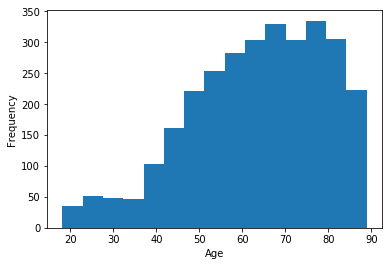

In [4]:
plt.hist(df1.age, bins=15, density=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

THis shows that the age distribution is still skewed to the right like the original data

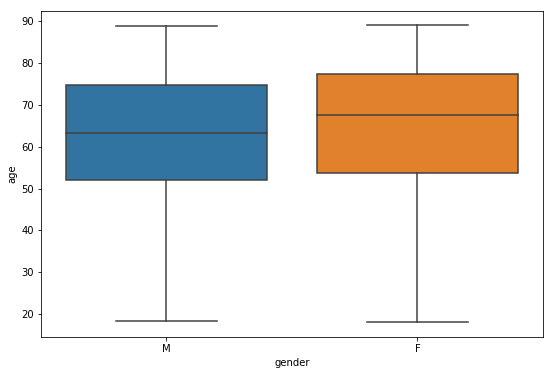

In [7]:
plt.figure(1, figsize=(9, 6))
sns.boxplot(x="gender", y="age",  data=df1)

The age distribution between male and female also appear to follow the same distribution and it seem like there is no significant different in the age distribution of male and female. The mean age is 64.45, median is 65.8 with a standard deviation of 15.80


## Vital Signs

Text(0.5, 1.0, 'Heart Rate')

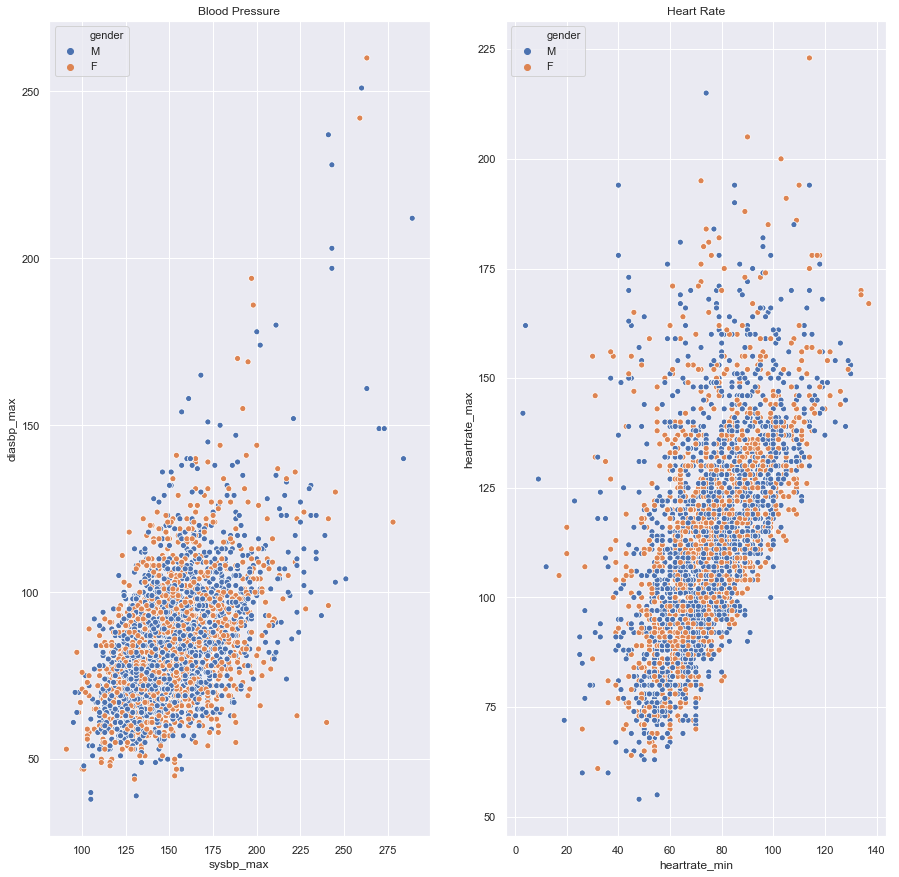

In [16]:
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(ncols=2)
sns.set(font_scale=1)

sns.scatterplot(x=df1.loc[:,'sysbp_max'], y=df1.loc[:,'diasbp_max'], hue=df1['gender'], ax = axs[0]).set_title('Blood Pressure')
sns.scatterplot(x=df1.loc[:,'heartrate_min'], y=df1.loc[:,'heartrate_max'], hue=df1['gender'], ax = axs[1]).set_title('Heart Rate')

